In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [21]:
# Define the path to your Excel file on Google Drive
load_file = 'DL (NR) 23-24.xlsx'
load_file2= 'DL (NR) 22-23.xlsx'
merged_data= 'data.xlsx'
merged_data= 'data.xlsx'

In [24]:
# Read the Excel file into a pandas DataFrame
data = pd.read_excel(load_file, skiprows=2, skipfooter=7)
data2= pd.read_excel(load_file2, skiprows=2, skipfooter=7)
data3= pd.read_excel(merged_data, skiprows=2, skipfooter=7)
# data.dropna(inplace=True)
# print(len(data))
# data = data.loc[data['Date'] <= '2023-07-23']
# Preprocessing
# Reshape the data to have the time series values in columns
data = data.T
data2= data2.T
data3= data3.T
# print(data.iloc[1:].head())

# Remove the first row (header) and convert the remaining data to numeric values
data = data[3:].apply(pd.to_numeric, errors= 'coerce').dropna()
data3 = data3[3:].apply(pd.to_numeric, errors= 'coerce')
data2 = data2[3:].apply(pd.to_numeric, errors= 'coerce')
# data
# print(data.shape)
print(data3.shape)
# print(len(data))/
# data= data[:114]
# data2= data2[:144]
# data3= data2[1:]
# data = data.iloc[1:].apply(pd.to_numeric, errors='coerce')
# data.index = pd.date_range(start='1/4/2023 0:00', periods=len(data), freq='15min')
data.index = pd.date_range(start='4/1/2022 0:00', periods=len(data), freq='1d')
data3.index = pd.date_range(start='4/1/2022 0:00', periods=len(data3), freq='1d')
data.index.name = 'Date'
data3.index.name= 'Date'
# # data2.index= pd.date_range(start='4/1/2023 0:00', periods=len(data), freq='15min')
# # '23/7/2023 0:00'
# # Slice the data up until 23rd July : 114 days
# # data = data.loc[:'23/7/2023 0:00']
# # print(data.tail())
# print(len(data))
# print(data.shape)
# # Set the index as the time intervals (0:00, 0:15, ...)
# # print(data.tail())
# # Print the head of the 
# # DataFrame
print(len(data3))
data3.dropna()
print(data3.tail())
print(len(data3))

(479, 96)
479
               0      1      2      3      4      5      6      7      8   \
Date                                                                        
2023-07-19  12.80  13.36  16.36  15.60  14.82  12.06  11.59   7.81   8.80   
2023-07-20  13.87  13.88   9.96  11.14  10.69  11.24  13.06  11.40  11.32   
2023-07-21  22.48  21.33  19.78  21.33  15.88  19.44  15.18  13.28   8.35   
2023-07-22  19.39  20.50  17.72  12.76  13.26  11.65   5.89   4.82   5.03   
2023-07-23  17.74  15.61  14.06  15.06  10.60  10.88  11.45  10.73  14.49   

               9   ...     86     87     88     89     90     91     92  \
Date               ...                                                    
2023-07-19   9.93  ...  25.83  21.28  22.87  24.77  23.79  20.86  27.43   
2023-07-20  18.02  ...  24.01  29.51  21.77  22.60  18.67  19.85  20.92   
2023-07-21   8.49  ...  26.72  23.56  26.76  26.05  26.27  22.18  22.50   
2023-07-22   9.03  ...  23.18  24.87  21.02  22.10  20.08  22.28  23.80

In [25]:
# Reset the index to have the date as a separate column
data3.reset_index(inplace=True)

# Reshape the dataframe using the stack() function
df = data3.set_index('Date').stack().to_frame().reset_index()

# Rename the columns
df.columns = ['Date', 'Interval', 'Value']



In [26]:
print(df.shape)
print(df.head())
df= df['Value']
print(df[-100:])

(45216, 3)
        Date  Interval  Value
0 2022-04-01         0  16.07
1 2022-04-01         1  13.75
2 2022-04-01         2  13.13
3 2022-04-01         3  10.36
4 2022-04-01         4   9.96
45116    23.80
45117    21.09
45118    21.24
45119    18.48
45120    17.74
         ...  
45211    21.51
45212    21.02
45213    17.81
45214    17.76
45215    18.21
Name: Value, Length: 100, dtype: float64


123


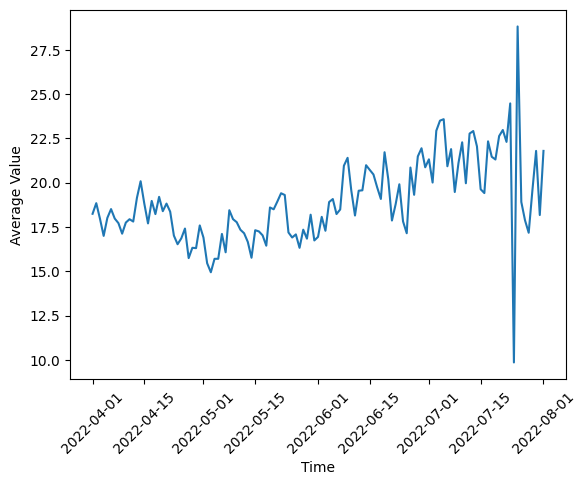

In [28]:

# Calculate the average of each day/row
data.index = pd.date_range(start='4/1/2022 0:00', periods=len(data), freq='1d')
data.index.name = 'Date'
daily_average = data.mean(axis=1)
print(len(daily_average))
# print((data.index ))
# Plot the daily average values
# Plot the daily average values
# print(data.index[-1])
plt.plot(data.index, daily_average)
plt.xlabel('Time')
# plt.xticks(data.index, [date.strftime('%m/%d') for date in data.index])
plt.ylabel('Average Value')
plt.xticks(rotation=45)
# Set the x-axis tick labels to display every nth tick
# n = 5  # Set the desired interval between ticks
# plt.xticks(np.arange(0, len(data.index), n))

plt.show()

479


/var/folders/2t/1b591x_d1wz5rz5gn_10qdww0000gn/T/ipykernel_56951/3570986706.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  daily_average = data3.mean(axis=1)


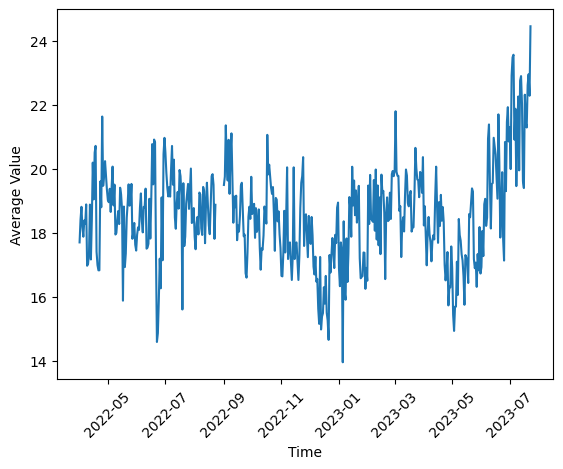

In [30]:

# Calculate the average of each day/row
data3.index = pd.date_range(start='4/1/2022 0:00', periods=len(data3), freq='1d')
data3.index.name = 'Date'
daily_average = data3.mean(axis=1)
print(len(daily_average))
# print((data.index ))
# Plot the daily average values
# Plot the daily average values
# print(data.index[-1])
plt.plot(data3.index, daily_average)
plt.xlabel('Time')
# plt.xticks(data.index, [date.strftime('%m/%d') for date in data.index])
plt.ylabel('Average Value')
plt.xticks(rotation=45)
# Set the x-axis tick labels to display every nth tick
# n = 5  # Set the desired interval between ticks
# plt.xticks(np.arange(0, len(data.index), n))

plt.show()

In [153]:
# import datetime

# # Calculate the average of each day/row
# daily_average = data.mean(axis=1)

# # Plot the daily average values
# plt.plot(data.index, daily_average)
# plt.xlabel('Date')
# plt.ylabel('Average Value')

# # Format the x-axis labels to display only the date
# plt.xticks(data.index, [date.strftime('%m/%d') for date in data.index])

# # Set the desired interval between x-axis ticks
# # n = 5  # Set the desired interval between ticks
# # plt.xticks(np.arange(0, len(data.index), n))
# # Set the desired number of points on the x-axis
# num_points = 10  # Set the desired number of points
# x_indices = np.linspace(0, len(data.index)-1, num_points, dtype=int)
# x_labels = data.index[x_indices]

# plt.xticks(x_indices, x_labels)
# plt.show()

In [154]:

# Extract the values from the DataFrame
values = data.values
val= df.values.reshape(df.values.shape[0], 1)
print(val.shape)
# Shape (114, 96)
# print("We have extracted the pandas dataframe into a numpy array of shape ", values.shape)


(10944, 1)


In [31]:

# Extract the values from the DataFrame
values = data3.values
val= df.values.reshape(df.values.shape[0], 1)
print(val.shape)
# Shape (114, 96)
# print("We have extracted the pandas dataframe into a numpy array of shape ", values.shape)

(45216, 1)


In [32]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
# normalized_data = scaler.fit_transform(values)
normalized_data = scaler.fit_transform(val)
print(normalized_data.shape)

(45216, 1)


In [33]:


# # Load your time series data into a pandas DataFrame
# # Replace 'data.csv' with the actual file path
# data = pd.read_csv('data.csv', parse_dates=['timestamp_column'])
# # Assuming 'load_column' contains the target load values target_column = 'load_column'
# # Extract target values
# target_values = data[target_column].values
# Normalize the data using Min-Max scaling
# scaler = MinMaxScaler()
# normalized_data = scaler.fit_transform(target_values.reshape(-1, 1)) # Prepare input sequences and target values
sequence_length = 10
X=[]
y=[]
for i in range(len(normalized_data) - sequence_length):
  X.append(normalized_data[i:i + sequence_length])
  y.append(normalized_data[i + sequence_length])
X = np.array(X)
y = np.array(y)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) # Build the LSTM model
#Shuffle is kept as false to maintain sequential nature of data?
# print(X_train.shape) (83, 10, 96) : I guess 83 examples of sequences of length 10, each of size 96, indicating one day of readings: 96= 1440/15
train_data_len= X_train.shape[0]
test_data_len= X_test.shape[0]
print(X_train.shape)
print(X_test.shape)
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(units=50, activation='relu', return_sequences=False))
model.add(Dense(25))
model.add(Dense(1)) # Output layer
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
# Make predictions
predicted_values = model.predict(X_test)
# Denormalize the predicted values
predicted_values_denormalized = scaler.inverse_transform(predicted_values)
true_values_denormalized = scaler.inverse_transform(y_test)
# Print or visualize the predictions and actual values
# ... (add code to display the predictions and actual values)

(36164, 10, 1)
(9042, 10, 1)


2023-09-21 03:53:41.851875: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


283/283 [==============================] - 1s 3ms/step - loss: 0.0062
Test Loss: 0.00622668769210577
283/283 [==============================] - 1s 3ms/step


In [34]:
print(predicted_values_denormalized.shape, true_values_denormalized.shape)
print(predicted_values_denormalized.dtype)
pred= predicted_values_denormalized.reshape(predicted_values_denormalized.shape[0]*predicted_values_denormalized.shape[1], 1)
true= true_values_denormalized.reshape(true_values_denormalized.shape[0]*true_values_denormalized.shape[1], 1)
diff= predicted_values_denormalized- true_values_denormalized
print(diff.shape)
rmse= np.sqrt(np.mean(diff**2))
print(rmse)

(9042, 1) (9042, 1)
float32
(9042, 1)
2.934950865422876


In [35]:
train = val[:train_data_len]
valid = val[:test_data_len]

36164
(36164, 1)
<class 'numpy.ndarray'>
20.093439999999998
[33468 14469 35973 15141 31457  2757 31458 26268 33375 32112]


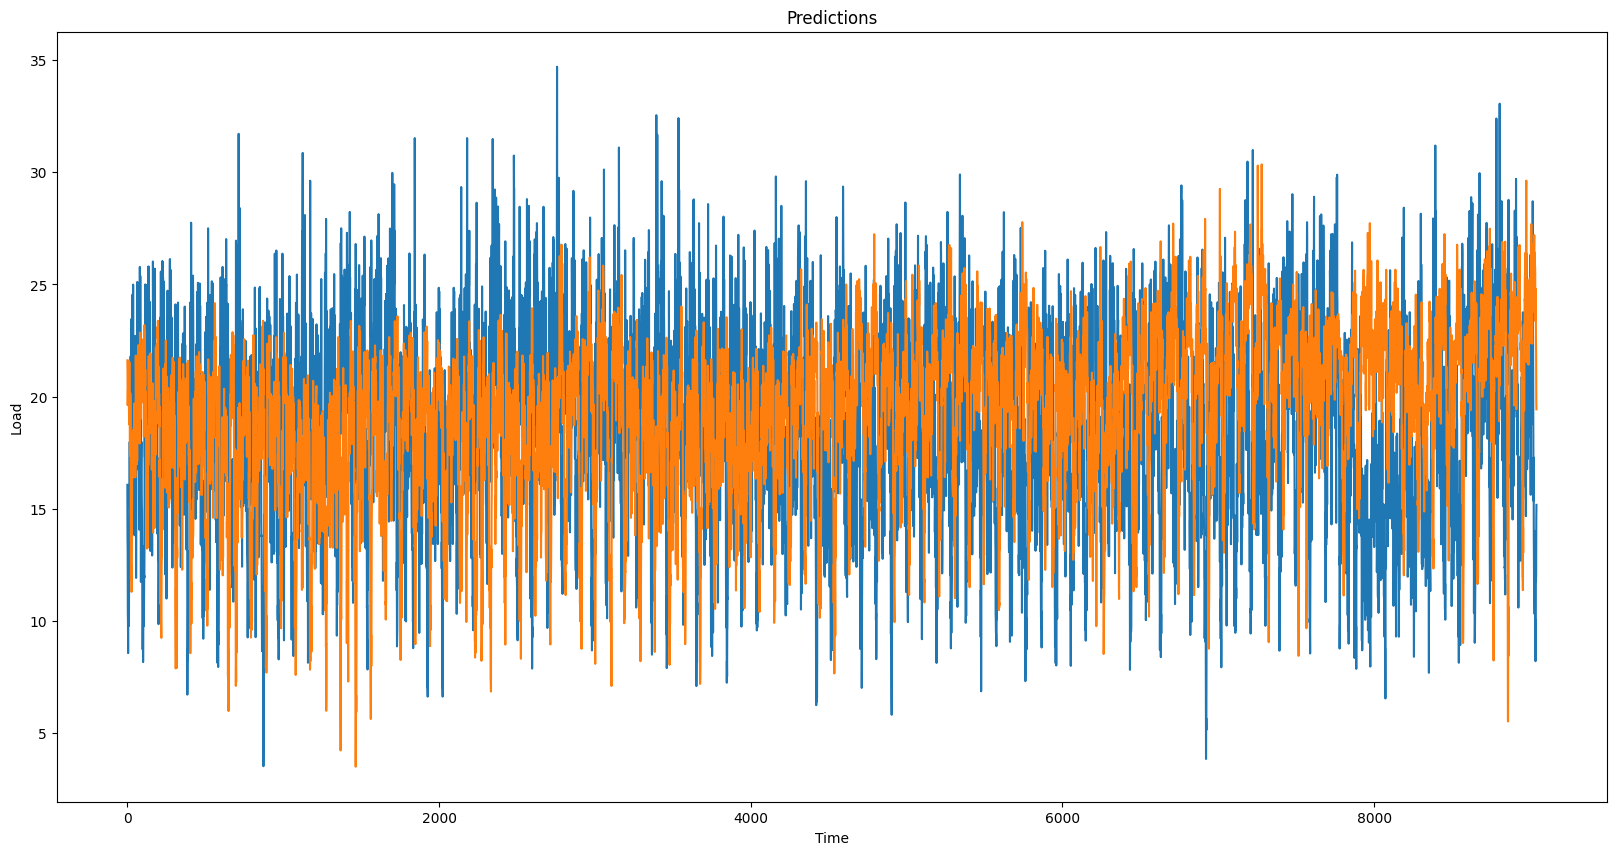

In [36]:

plt.figure(figsize=(20,10))
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Predictions')
print(len(train))
print(train.shape)
print(type(train))
# plt.plot(train)
train= train.reshape((train.shape[0], ))
# print(train[:96])
print(train[8730])
print(np.argsort(train)[-10:])
# print(sorted(train)[-50:])
plt.plot(valid)
plt.plot(pred)